In [35]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Read Image
test_image = cv2.imread('me.jpg')

In [37]:
#Image Resizing
test_image = cv2.resize(test_image, (350, 466))

In [38]:
def display(test_image):
    plt.figure(figuresize=(10,10))

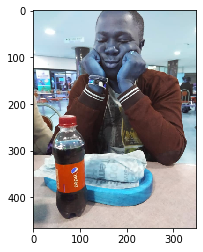

In [39]:
plt.imshow(test_image)

In [40]:
test_image

array([[[182, 218, 228],
        [182, 218, 228],
        [182, 218, 228],
        ...,
        [181, 210, 215],
        [181, 210, 215],
        [181, 210, 215]],

       [[182, 218, 228],
        [182, 218, 228],
        [182, 218, 228],
        ...,
        [181, 210, 215],
        [181, 210, 215],
        [181, 210, 215]],

       [[182, 218, 228],
        [182, 218, 228],
        [182, 218, 228],
        ...,
        [181, 210, 215],
        [181, 210, 215],
        [181, 210, 215]],

       ...,

       [[181, 167, 161],
        [180, 166, 160],
        [179, 164, 161],
        ...,
        [221, 207, 201],
        [220, 207, 199],
        [217, 204, 196]],

       [[180, 166, 160],
        [181, 167, 160],
        [181, 166, 163],
        ...,
        [223, 209, 203],
        [222, 209, 201],
        [222, 209, 201]],

       [[176, 162, 156],
        [177, 163, 157],
        [179, 164, 161],
        ...,
        [221, 207, 201],
        [221, 208, 200],
        [222, 209, 201]]

In [41]:
test_image.shape

(466, 350, 3)

In [42]:
# Histogram (Graphical representation of the distribution of pixel intensities)
hist = cv2.calcHist([test_image], [0], None, [256], [0, 256])

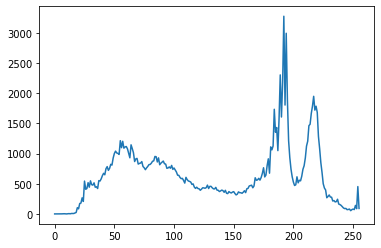

In [43]:
plt.plot(hist)

In [44]:
# Convert to grayscale
gray_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

In [45]:
# Preprocessing the image with Median Filter using 4 pixel value
gray_image = cv2.medianBlur(gray_image, 5)

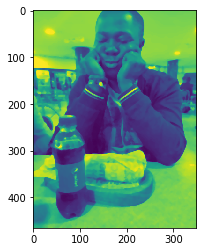

In [46]:
plt.imshow(gray_image)

In [47]:
# Detect and enhance the edges using adaptive thresholding
edges = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

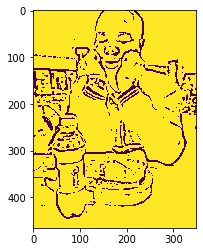

In [48]:
plt.imshow(edges)

In [49]:
# Usng Bilateral Filter to filter images while preserving edges (the bilateral filter acts more like a Gaussian blur filter)
colour_image = cv2.bilateralFilter(test_image, 9, 300, 300)

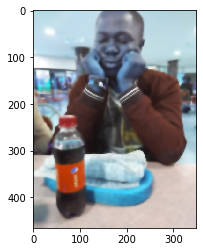

In [50]:
plt.imshow(colour_image)

In [51]:
# fuse the two effects together into a single image using cv2.bitwise_and
cartoonised_image =  cv2.bitwise_and(colour_image, colour_image, mask=edges)

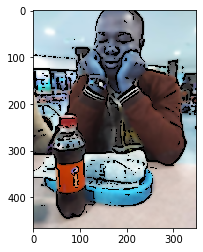

In [52]:
plt.imshow(cartoonised_image)

In [ ]:
#The cv::waitKey(n) function is used to introduce a delay of n milliseconds while rendering images to windows. 
cv2.imshow('Image', test_image)
cv2.imshow("Cartoon", cartoonised_image)
cv2.imshow("colour_image", colour_image)
cv2.imshow("edges", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()